In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/xhding/workspaces/torch-deep-retina')
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
import torch
import h5py
from  torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
from scipy.stats import pearsonr
from scipy.special import factorial
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from fnn.evaluation import *
import fnn.models as models
from fnn.config import get_custom_cfg
from fnn.data import TestDataset, ValidationDataset
from fnn.distributions import *
from fnn.notebook.utils import *
from torchdeepretina.datas import loadexpt
from torchdeepretina.pyret_func import estfr

In [3]:
file_path = '/home/xhding/tem_stim/21-03-15/naturalscene.h5'
cells = [0,1,2,3,4,6]
t_list = [3,3,3,3,2,3]
recording = recording_stats(file_path, cells)
recording_cut = recording_stats(file_path, cells, truncate=True, t_list=t_list)
single_trial_bin = recording.single_trial_bin
single_trial_bin_cut = recording_cut.single_trial_bin

In [4]:
device = torch.device('cuda:6')
cfg = get_custom_cfg('bn_cnn_stack_try')
model_func = getattr(models, 'BN_CNN_Stack_Old')
model_kwargs = dict(cfg.Model)
model = model_func(**model_kwargs).to(device)
checkpoint_path = '/home/xhding/saved_model/BN_CNN_Stack/epoch_070_loss_-3.54_pearson_0.6845.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
test_data = DataLoader(TestDataset(cfg), batch_size=500)
test_pc, pred, targ = pearsonr_batch_eval(model, test_data, 6, device)

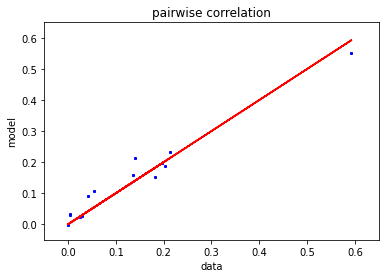

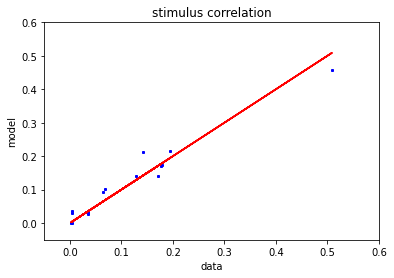

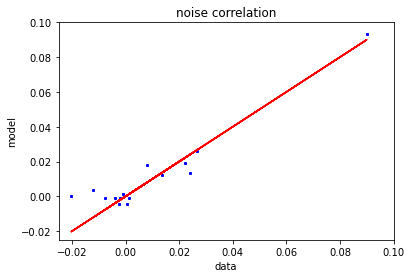

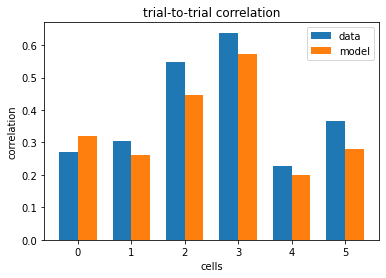

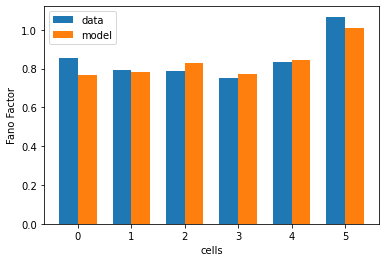

0.002014578791665096


In [6]:
binomial_para = [2.17, 2.85, 1.91, 1.69, 1., 0.47]
t_list = [3,3,3,3,2,3]
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0., 0.6, 0.], seed=2)
poly_paras = poly_para_fit(recording, pred_single_trial_pre.copy(), pred, thre=7, threshold=0.4, intv=0.6, sigma=True)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=2, thre=7)

min_error = 10
for i in range(300):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
correlation_plot_2(single_trial_bin, pred_single_trial_try)
print(min_error)

In [7]:
for seed in range(100):
    binomial_para = [2.17, 2.85, 1.91, 1.69, 1., 0.47]
    t_list = [3,3,3,3,2,3]
    pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0., 0.6, 0.], seed=seed)
    poly_paras = poly_para_fit(recording, pred_single_trial_pre.copy(), pred, thre=7, threshold=0.4, intv=0.6, sigma=True)
    pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=seed, thre=7)

    min_error = 10
    for i in range(300):
        pred_single_trial = pred_single_trial_multi[i]
        error = error_corr2(single_trial_bin, pred_single_trial)
        if error < min_error:
            min_error = error
    print(seed, min_error)

0 0.0028661347966665246
1 0.0024915140189809702
2 0.001393684885471099
3 0.003105265637733702
4 0.002884889647388911
5 0.003612330420082644
6 0.003109492412965283
7 0.003249853725246695
8 0.003847478193962329
9 0.002942807891780932
10 0.003266395375224994
11 0.0033902389919164616
12 0.0018240548260027535
13 0.0037147305634075587
14 0.0033483679906837253
15 0.0033412217120903876
16 0.0026659069474162427
17 0.003190252567079091
18 0.004316040030673804
19 0.003123937653772081
20 0.0030362388677203076
21 0.002618099793179136
22 0.004221516984237203
23 0.0031207318636943984
24 0.0023127984204534303
25 0.0034595991890610626
26 0.0028770906523980706
27 0.0034487314903161987
28 0.0029335692324705368
29 0.0038194655887466944
30 0.002569593506199699
31 0.0021470697735083183
32 0.0025724603254926324
33 0.003053987416436111
34 0.003418332033802079
35 0.0036704203941044485
36 0.0031265340923935826
37 0.004197972207245113
38 0.0029252756728442545
39 0.002015412822517421
40 0.004100831036727866
41 0.

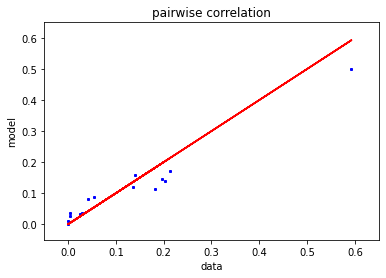

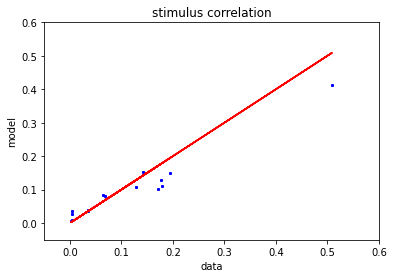

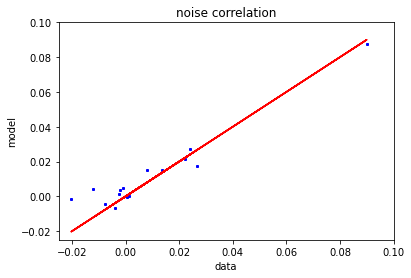

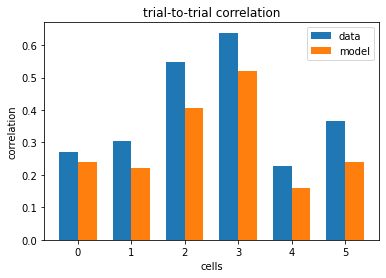

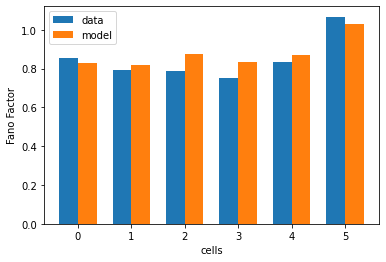

0.0017507198968049512


In [15]:
binomial_para = [2.17, 2.85, 1.91, 1.69, 1., 0.47]
t_list = [3,3,3,3,2,3]
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0., 0.6, 0.], seed=99)
poly_paras = poly_para_fit(recording, pred_single_trial_pre.copy(), pred, thre=7, threshold=0.4, intv=0.6, sigma=True)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=99, thre=2.5)

min_error = 10
for i in range(300):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
correlation_plot_2(single_trial_bin, pred_single_trial_try)
print(min_error)

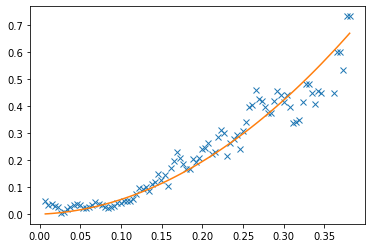

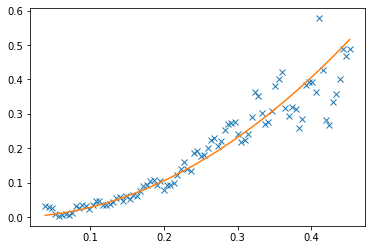

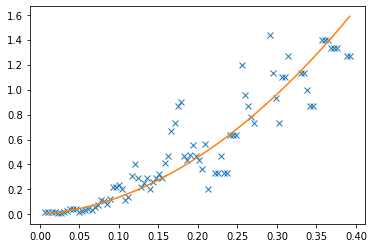

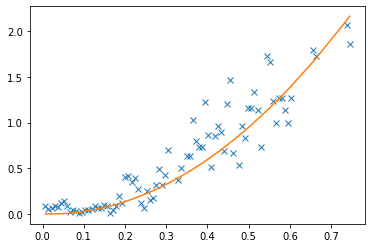

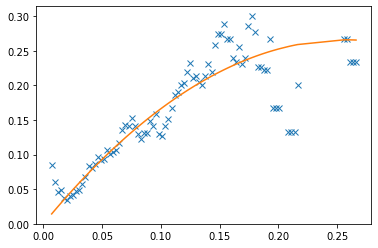

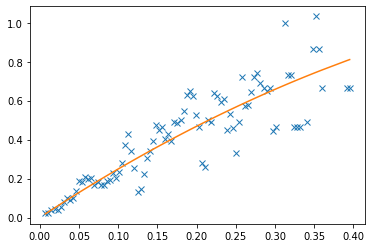

In [16]:
def poly(x,c,d):
        return c*x**2+d*x
    
for cell in range(6):
    means = []
    rates = []
    sigmas = []
    thre = 2.5
    pred_single_trial_pre[:, pred<thre] = 0
    for rate in np.linspace(0.7, pred_single_trial_pre.mean(0)[:, cell].max(), 100):
        mean, var, _, w = recording.stats_rate(pred_single_trial_pre.mean(0), cell=cell, rate=rate, intv=0.6)
        if var > 0:
            sigmas.append(np.sqrt(var/(w-1)))
            means.append(mean)
            rates.append(rate/100)
    sigmas = np.array(sigmas)[~np.isnan(means)]
    rates = np.array(rates)[~np.isnan(means)]
    means = np.array(means)[~np.isnan(means)]

    max_idx = np.where(means >= 0.8*means.max())[0][-1]
    min_idx = np.where(rates == rates.min())[0][0]
    slope = (means[max_idx] -  means[min_idx]) / (rates[max_idx] -  rates[min_idx])
    means_res = means - (rates - rates[min_idx]) * slope - means[min_idx]
    valid_idx = np.where(np.abs(means_res/means[max_idx]) < 0.4)

    rates = rates[valid_idx]
    means = means[valid_idx]
    sigmas = sigmas[valid_idx]

    para = curve_fit(poly, rates, means, sigma=sigmas)[0]

    plt.plot(rates, means, 'x')
    plt.plot(rates, [poly(rates[i], *para) for i in range(len(rates))])
    plt.show()

In [17]:
pred_single_trial_try.sum()

11936

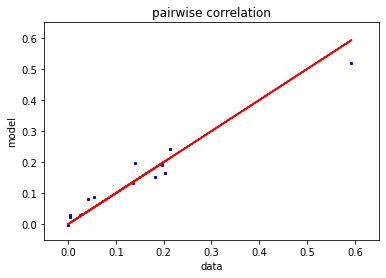

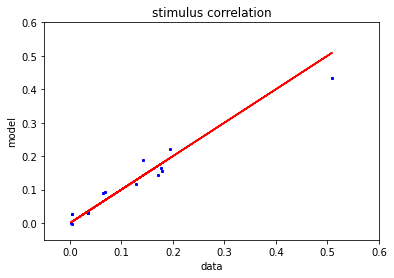

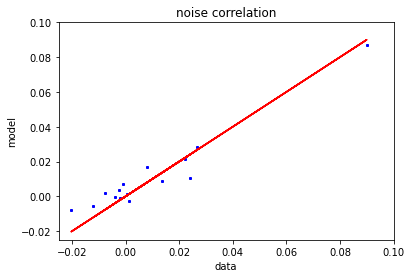

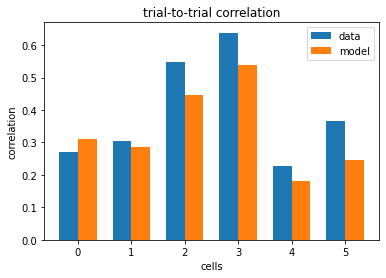

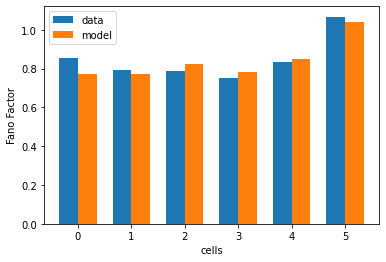

0.001398305463790072


In [18]:
binomial_para = [2.17, 2.85, 1.91, 1.69, 1., 0.47]
t_list = [3,3,3,3,2,3]
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0., 0.6, 0.], seed=77)
poly_paras = poly_para_fit(recording, pred_single_trial_pre.copy(), pred, thre=7, threshold=0.4, intv=0.6, sigma=True)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=77, thre=7)

min_error = 10
for i in range(300):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
correlation_plot_2(single_trial_bin, pred_single_trial_try)
print(min_error)

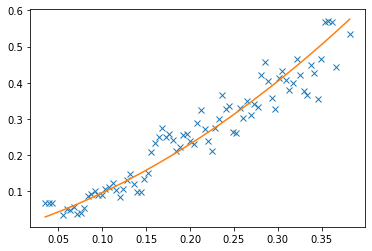

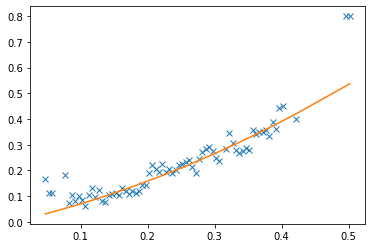

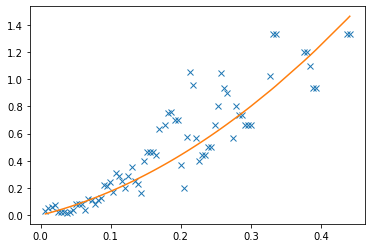

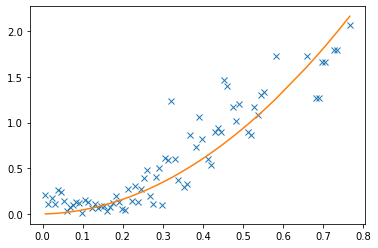

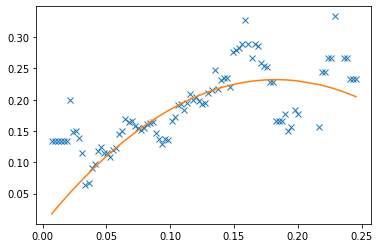

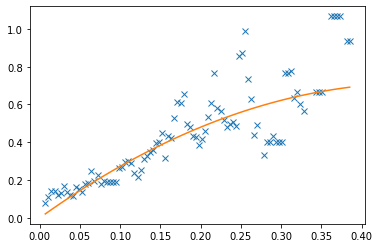

In [19]:
def poly(x,c,d):
        return c*x**2+d*x
    
for cell in range(6):
    means = []
    rates = []
    sigmas = []
    thre = 7
    pred_single_trial_pre[:, pred<thre] = 0
    for rate in np.linspace(0.7, pred_single_trial_pre.mean(0)[:, cell].max(), 100):
        mean, var, _, w = recording.stats_rate(pred_single_trial_pre.mean(0), cell=cell, rate=rate, intv=0.6)
        if var > 0:
            sigmas.append(np.sqrt(var/(w-1)))
            means.append(mean)
            rates.append(rate/100)
    sigmas = np.array(sigmas)[~np.isnan(means)]
    rates = np.array(rates)[~np.isnan(means)]
    means = np.array(means)[~np.isnan(means)]

    max_idx = np.where(means >= 0.8*means.max())[0][-1]
    min_idx = np.where(rates == rates.min())[0][0]
    slope = (means[max_idx] -  means[min_idx]) / (rates[max_idx] -  rates[min_idx])
    means_res = means - (rates - rates[min_idx]) * slope - means[min_idx]
    valid_idx = np.where(np.abs(means_res/means[max_idx]) < 0.4)

    rates = rates[valid_idx]
    means = means[valid_idx]
    sigmas = sigmas[valid_idx]

    para = curve_fit(poly, rates, means, sigma=sigmas)[0]

    plt.plot(rates, means, 'x')
    plt.plot(rates, [poly(rates[i], *para) for i in range(len(rates))])
    plt.show()

In [20]:
file_path = '/home/xhding/tem_stim/15-11-21b/naturalscene_test.h5'
cells = list(range(11))
t_list = [4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 3]
recording = recording_stats(file_path, cells)
recording_cut = recording_stats(file_path, cells, truncate=True, t_list=t_list)
single_trial_bin = recording.single_trial_bin
single_trial_bin_cut = recording_cut.single_trial_bin

In [21]:
device = torch.device('cuda:0')
cfg = get_custom_cfg('fc_15-11-21b')
model_func = getattr(models, cfg.Model.name)
model_kwargs = dict(cfg.Model)
model = model_func(**model_kwargs).to(device)
checkpoint_path = '/home/xhding/saved_model/BN_CNN_Stack_FC_2/epoch_015_loss_-8.56_pearson_0.6841.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
test_data = DataLoader(TestDataset(cfg), batch_size=500)
test_pc, pred, targ = pearsonr_batch_eval(model, test_data, 11, device)

In [26]:
for seed in range(100):
    binomial_para = [1.75, 1.62, 1.53, 1.48, 1.62, 1.41, 1.65, 1.23, 1.50, 1.38, 1.69]
    t_list = [4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 3]
    pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 6, [1.7, 0., 0., 0.], seed=seed, noise_locs=[3,4,5])
    poly_paras = poly_para_fit(recording, pred_single_trial_pre, pred, thre=10, threshold=0.3, intv=0.5, sigma=True)
    pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=seed, thre=10)

    min_error = 10
    for i in range(300):
        pred_single_trial = pred_single_trial_multi[i]
        error = error_corr2(single_trial_bin, pred_single_trial)
        if error < min_error:
            min_error = error
    print(seed, min_error)

0 0.012618350044301214
1 0.01198455577789635
2 0.009754462780282145
3 0.010619235911960236
4 0.00955683536024271
5 0.015205669175967699
6 0.012587363860797451
7 0.009133201766998608
8 0.01120853189113644
9 0.008362472487475217
10 0.00999785595508514
11 0.007022696879785118
12 0.01063992432643516
13 0.009775648918109392
14 0.00793312759293017
15 0.00924340355950109
16 0.008789062895650098
17 0.009889902064201442
18 0.009467410877497596
19 0.014788357642020045
20 0.011186948388790523
21 0.009065142497439999
22 0.010060234258912377
23 0.009669559580469389
24 0.010442221733676635
25 0.01049439005272867
26 0.012998083132188353
27 0.01499836009198985
28 0.010661538448761132
29 0.00911310889888124
30 0.00805114993431222
31 0.011108228167493017
32 0.009253562857457428
33 0.008828974502386702
34 0.013789624163706977
35 0.009865509074747895
36 0.009131475766291471


ValueError: `ydata` must not be empty!

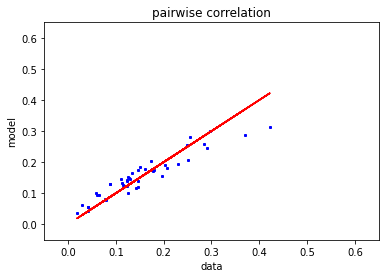

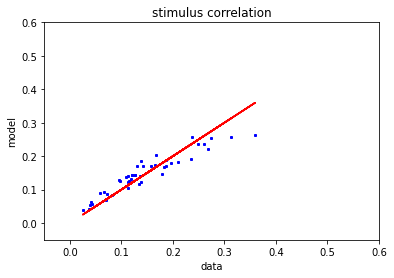

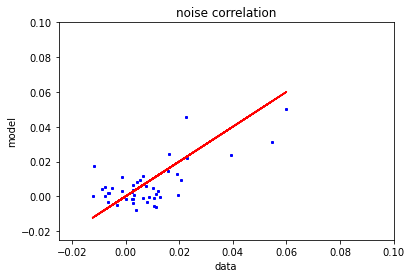

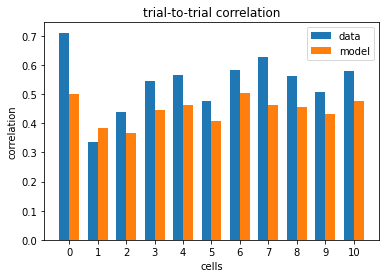

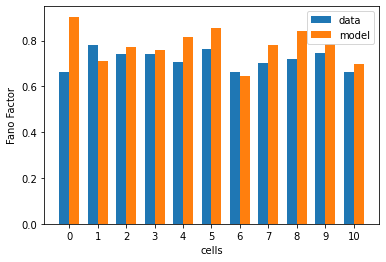

0.011058454946775155


In [32]:
binomial_para = [1.75, 1.62, 1.53, 1.48, 1.62, 1.41, 1.65, 1.23, 1.50, 1.38, 1.69]
t_list = [4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 3]
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 6, [0., 0., 0.3, 0.], seed=58, noise_locs=[3,4,5])
poly_paras = poly_para_fit(recording, pred_single_trial_pre, pred, thre=6, threshold=0.3, intv=0.5, sigma=True)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=58, thre=6)
ignore_idxs = [2*11+i for i in range(11)] + [i*11+2 for i in range(11)]

min_error = 10
for i in range(300):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial, ignore_idxs)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try, ignore_idxs)
print(min_error)

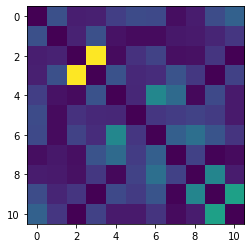

In [31]:
diff = np.abs(noise_corr2(single_trial_bin) - noise_corr2(pred_single_trial_try))
for i in range(11):
    diff[i, i] = 0
plt.imshow(diff)